In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.integrate import odeint
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

In [2]:
plt.rcParams["animation.html"] = "jshtml" # Renders animation in HTML
plt.rcParams['animation.embed_limit'] = 1024 # Animation size limit (MB)

# The Double Pendulum

Please input the initial conditions

In [3]:
m1 = float(input("Enter Mass 1 (kg):\n"))
L1 = float(input("Enter Length 1 (m):\n"))
phi10 = float(input("Enter Initial Phi 1 (deg):\n"))
m2 = float(input("Enter Mass 2 (kg):\n"))
L2 = float(input("Enter Length 2 (m):\n"))
phi20 = float(input("Enter Initial Phi 2 (deg):\n"))

Enter Mass 1 (kg):
2
Enter Length 1 (m):
2
Enter Initial Phi 1 (deg):
180
Enter Mass 2 (kg):
1
Enter Length 2 (m):
1
Enter Initial Phi 2 (deg):
179


In [4]:
def lagrange(y, t, L1=L1, L2=L2, m1=m1, m2=m2):
    '''
    Returns the first and second time derivatives of phi1 and phi2 via the
    Euler-Lagrange equations based on the input parameters.
    '''
    
    # Unpack initial conditions
    p1, p1d, p2, p2d = y
    
    # Common sums
    dp = p1 - p2
    dpd = p1d - p2d
    M = m1 + m2
    
    # Equations of Motion
    p1dd = (- m2 * L1 * p1d ** 2 * np.sin(dp) * np.cos(dp)
            + g * m2 * np.sin(p2) * np.cos(dp)
            - m2 * L2 * p2d ** 2 * np.sin(dp) - M * g * np.sin(p1)
           ) / (L1 * M - m2 * L1 * np.cos(dp) ** 2)
    
    p2dd = (m2 * L2 * p2d ** 2 * np.sin(dp) * np.cos(dp)
            + g * np.sin(p1) * np.cos(dp) * M
            + L1 * p1d ** 2 * np.sin(dp) * M - g * np.sin(p2) * M
           ) / (L2 * M - m2 * L2 * np.cos(dp) ** 2)
    
    return p1d, p1dd, p2d, p2dd


def energy(y, L1=L1, L2=L2, m1=m1, m2=m2):
    '''
    Returns the total energy of the system at a given instant
    '''
    
    # Unpack initial conditions
    p1, p1d, p2, p2d = y
    
    # Common sums
    dp = p1 - p2
    dpd = p1d - p2d
    M = m1 + m2
    
    # Calculate total energy for each pendulum
    K1 = 1 / 2 * m1 * (L1 * p1d) ** 2
    h1 = L1 * (1 - np.cos(p1))
    U1 = m1 * g * h1
    K2 = 1 / 2 * m2 * ((L2 * p2d) ** 2 + 2 * L1 * L2 * p1d * p2d * np.cos(dp)
                       + (L1 * p1d) ** 2)
    h2 = h1 + L2 * (1 - np.cos(p2))
    U2 = m2 * g * h2
    
    return K1 + U1 + K2 + U2


def init():
    '''
    Establishes initial frame for animation.
    '''
    
    ax.set_xlim(- 3 / 2 * L, 3 / 2 * L)
    ax.set_ylim(- 3 / 2 * L, 3 / 2 * L)
    
    ax.legend([f't = {00.00} s', f'E = {00.00} J'],
              handletextpad=0, handlelength=0)
    
    line1.set_data([0, x1[0]], [0, y1[0]])
    line2.set_data([x1[0], x2[0]], [y1[0], y2[0]])
    dot1.set_offsets([x1[0], y1[0]])
    dot2.set_offsets([x2[0], y2[0]])
    trail1.set_data(x1[0], y1[0])
    trail2.set_data(x2[0], y2[0])
    
    return pendulum


def update(frame):
    '''
    Update the animation frame based on the next position of the pendulum.
    '''
    
    # Grab current positions
    r1 = [x1[frame], y1[frame]]
    r2 = [x2[frame], y2[frame]]
    
    ax.legend([f't = {t[frame]:6.2f} s', f'E = {E[frame]:6.2f} J'],
              handletextpad=0, handlelength=0)
    
    line1.set_data([0, r1[0]], [0, r1[1]])
    line2.set_data([r1[0], r2[0]], [r1[1], r2[1]])
    dot1.set_offsets([r1[0], r1[1]])
    dot2.set_offsets([r2[0], r2[1]])
    trail1.set_data(x1[0:frame], y1[0:frame])
    trail2.set_data(x2[0:frame], y2[0:frame])
    
    return pendulum

In [5]:
# Gravitational acceleration
g = 9.81

# Establishing Time Interval
tmax, dt = 120, 1 / 60
t = np.arange(0, tmax, dt)

# Initial Conditions
y0 = np.array([phi10 * np.pi / 180, 0, phi20 * np.pi / 180, 0])

# Calculate position
y = odeint(lagrange, y0, t)

# Total Energy
E = [energy(r) for r in y]

# Convert to Cartesian coordinates of the two bob positions.
phi1, phi2 = y[:,0], y[:,2]
x1 = L1 * np.sin(phi1)
y1 = - L1 * np.cos(phi1)
x2 = x1 + L2 * np.sin(phi2)
y2 = y1 - L2 * np.cos(phi2)

Generate Plot and display statistics

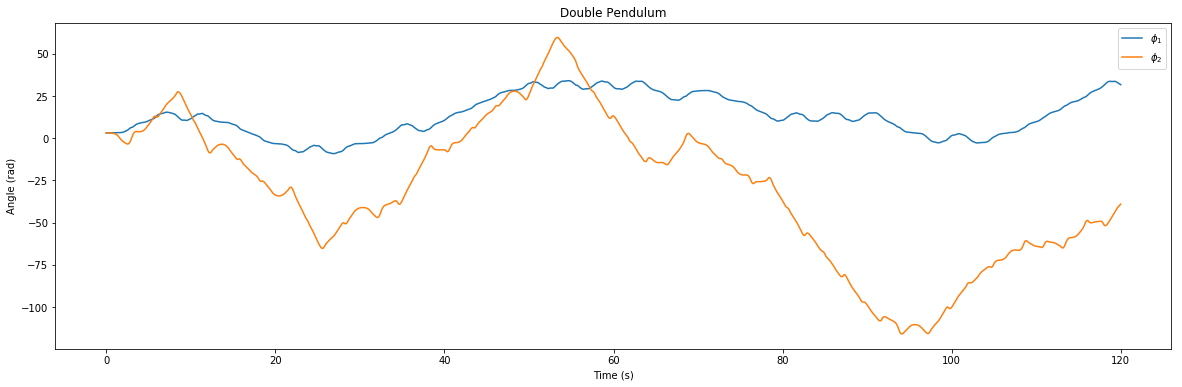

E_avg = 137.3383
E_std = 0.0001


In [6]:
plt.figure(figsize=(20,6))
plt.title('Double Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.plot(t, (phi1), label='$\phi_1$')
plt.plot(t, (phi2), label='$\phi_2$')
plt.legend()
plt.show()

print(f'E_avg = {np.mean(E):.4f}\nE_std = {np.std(E):.4f}')

Create Animation

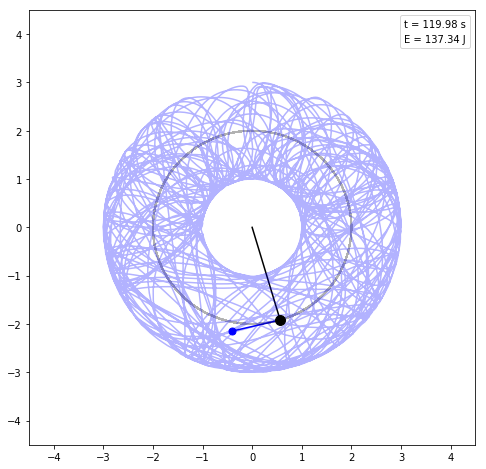

In [7]:
# Initial x, y
x10 , y10 = x1[0], y1[0]
x20, y20 = x2[0], y2[0]

# Create figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# Frames for pendulum
line1, = plt.plot([], [], 'k', zorder=0)
line2, = plt.plot([], [], 'b', zorder=0)
dot1 = plt.scatter([], [], m1 * 49, 'black')
dot2 = plt.scatter([], [], m2 * 49, 'blue')
trail1, = plt.plot([], [], 'k', zorder=0, alpha=0.3)
trail2, = plt.plot([], [], 'b', zorder=0, alpha=0.3)
pendulum = [line1] + [line2] + [dot1] + [dot2] + [trail1] + [trail2]

# Window size
L = L1 + L2

# Generate and display animation
anim = FuncAnimation(fig, update, init_func=init,
                     frames=np.size(phi1),
                     interval=dt * 1000, blit=True)

HTML(anim.to_html5_video())